In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Handler import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
PATH_DATA = '/project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap'

In [3]:
# List all files in the folder
file_list = os.listdir(PATH_DATA)
# Filter the list to include only files of interest (e.g., files ending with '.h5')
file_list = [f for f in file_list if f.endswith('.h5')]
# Sort the file list if needed
file_list.sort()
print(file_list)

['2024-11-10_21-52_run23_gandalf_Test_samples_2337703.h5', '2024-11-10_21-59_run28_gandalf_Test_samples_2335795.h5', '2024-11-10_21-59_run29_gandalf_Test_samples_2339890.h5', '2024-11-10_21-59_run30_gandalf_Test_samples_2339418.h5', '2024-11-10_22-02_run10_gandalf_Test_samples_2336956.h5', '2024-11-10_22-02_run31_gandalf_Test_samples_2339008.h5', '2024-11-10_22-03_run32_gandalf_Test_samples_2336332.h5', '2024-11-10_22-04_run33_gandalf_Test_samples_2336886.h5', '2024-11-10_22-06_run34_gandalf_Test_samples_2338917.h5', '2024-11-10_22-06_run35_gandalf_Test_samples_2333077.h5', '2024-11-10_22-07_run36_gandalf_Test_samples_2335313.h5', '2024-11-10_22-09_run37_gandalf_Test_samples_2339323.h5', '2024-11-10_22-10_run38_gandalf_Test_samples_2336244.h5', '2024-11-10_22-12_run39_gandalf_Test_samples_2334501.h5', '2024-11-10_22-12_run40_gandalf_Test_samples_2336096.h5', '2024-11-10_22-12_run41_gandalf_Test_samples_2336575.h5', '2024-11-10_22-14_run42_gandalf_Test_samples_2335869.h5', '2024-11-10_2

In [4]:
dict_means = {
    "unsheared/mag_r": [],
    "unsheared/mag_i": [],
    "unsheared/mag_z": [],
}

In [5]:
for file_number, filename in enumerate(file_list):
    # if file_number > 1:
    #     break
    print(f"{file_number + 1} of {len(file_list)} files")
    df_gandalf = pd.read_hdf(f"{PATH_DATA}/{filename}", mode='r')
    for col in dict_means.keys():
        dict_means[col].append(df_gandalf[col].mean())

1 of 103 files
2 of 103 files
3 of 103 files
4 of 103 files
5 of 103 files
6 of 103 files
7 of 103 files
8 of 103 files
9 of 103 files
10 of 103 files
11 of 103 files
12 of 103 files
13 of 103 files
14 of 103 files
15 of 103 files
16 of 103 files
17 of 103 files
18 of 103 files
19 of 103 files
20 of 103 files
21 of 103 files
22 of 103 files
23 of 103 files
24 of 103 files
25 of 103 files
26 of 103 files
27 of 103 files
28 of 103 files
29 of 103 files
30 of 103 files
31 of 103 files
32 of 103 files
33 of 103 files
34 of 103 files
35 of 103 files
36 of 103 files
37 of 103 files
38 of 103 files
39 of 103 files
40 of 103 files
41 of 103 files
42 of 103 files
43 of 103 files
44 of 103 files
45 of 103 files
46 of 103 files
47 of 103 files
48 of 103 files
49 of 103 files
50 of 103 files
51 of 103 files
52 of 103 files
53 of 103 files
54 of 103 files
55 of 103 files
56 of 103 files
57 of 103 files
58 of 103 files
59 of 103 files
60 of 103 files
61 of 103 files
62 of 103 files
63 of 103 files
6

In [6]:
lst_runs = [i+1 for i in range(len(dict_means["unsheared/mag_r"]))]

In [126]:
def flux2mag(flux, zero_pt=30):
    return zero_pt - 2.5 * np.log10(flux)

In [123]:
df_balrog = pd.read_hdf(f"/project/ls-gruen/users/patrick.gebhardt/data/sompz/y3_balrog2_v1.2_merged_select2_bstarcut_matchflag1.5asec_snr_SR_corrected_uppersizecuts.h5", mode='r')

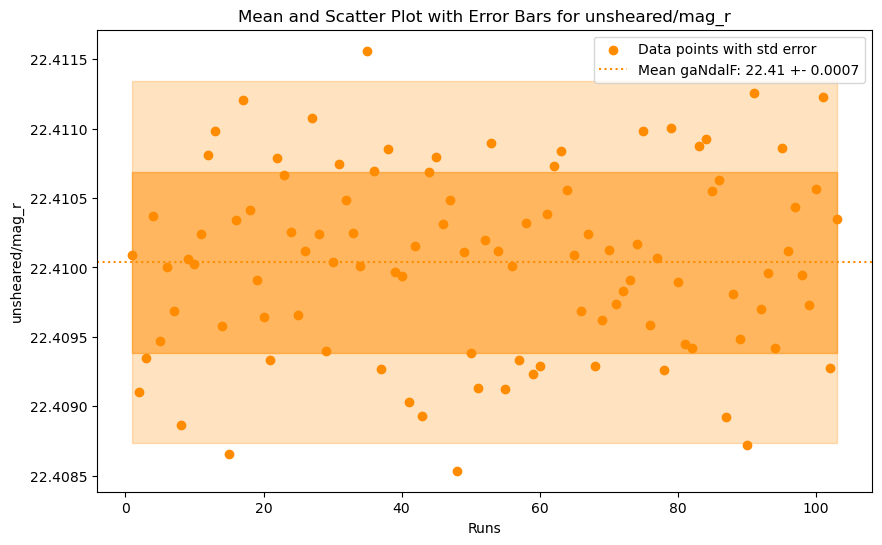

In [140]:
mean_value = np.mean(dict_means["unsheared/mag_r"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_r"]))
std_dev = np.std(dict_means["unsheared/mag_r"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_r"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_r"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean gaNdalF: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_r")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_r")
plt.legend()
plt.show()

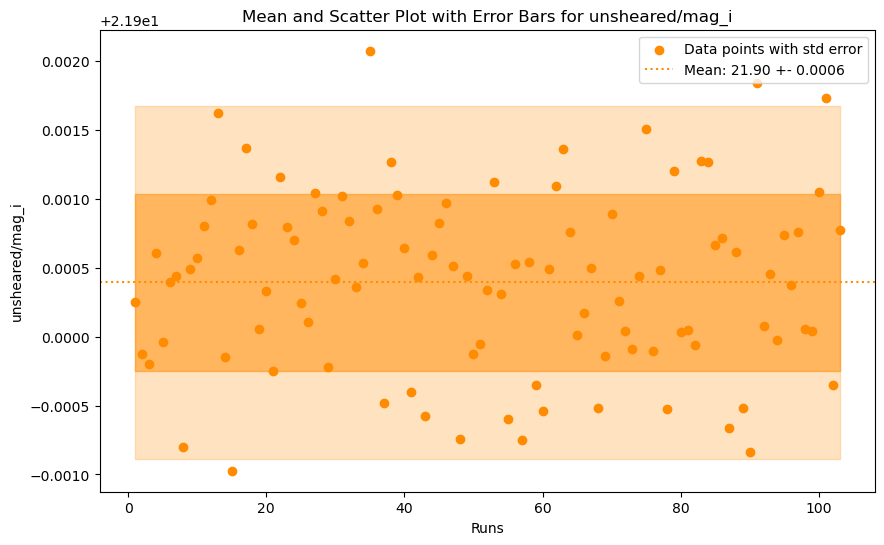

In [138]:
mean_value = np.mean(dict_means["unsheared/mag_i"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_i"]))
std_dev = np.std(dict_means["unsheared/mag_i"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_i"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_i"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_i")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_i")
plt.legend()
plt.show()

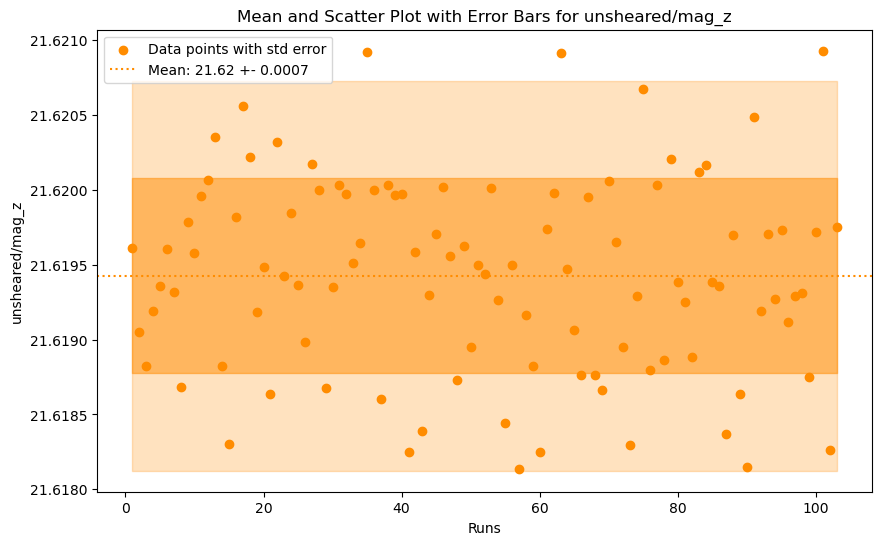

In [139]:
mean_value = np.mean(dict_means["unsheared/mag_z"])
mean_balrog = np.mean(flux2mag(df_balrog["unsheared/flux_z"]))
std_dev = np.std(dict_means["unsheared/mag_z"])
plt.figure(figsize=(10, 6))
plt.scatter(lst_runs, dict_means["unsheared/mag_z"], color='#ff8c00', label="Data points with std error")
# plt.errorbar(lst_runs, dict_means["unsheared/mag_z"], yerr=std_dev, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)
plt.axhline(mean_value, linestyle='dotted', color='#ff8c00', label=f'Mean: {mean_value:.2f} +- {std_dev:.4f}')
# plt.axhline(mean_balrog, linestyle='--', color='#51a6fb', label=f'Mean Balrog: {mean_balrog:.2f}')
# Fill the ±1σ and ±2σ ranges around the mean
plt.fill_between(lst_runs, mean_value - std_dev, mean_value + std_dev, color='#ff8c00', alpha=0.5)
plt.fill_between(lst_runs, mean_value - 2*std_dev, mean_value + 2*std_dev, color='#ff8c00', alpha=0.25)
plt.xlabel("Runs")
plt.ylabel("unsheared/mag_z")
plt.title("Mean and Scatter Plot with Error Bars for unsheared/mag_z")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
FILE_1 = '~/Output/sompz_paper/mean_gandalf.csv'
df_sompz_gandalf = pd.read_csv(FILE_1)

mean_bins = ['Mean Bin 1', 'Mean Bin 2', 'Mean Bin 3', 'Mean Bin 4']
bins = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']
means = df_sompz_gandalf[mean_bins].mean()
stds = df_sompz_gandalf[mean_bins].std()
# Balrog reference lines
balrog_values = [0.3255, 0.5086, 0.7470, 0.9320]
balrog_error = 0.01  # Given error for Balrog in each bin

ylim = [(0.31, 0.38), (0.49, 0.56), (0.72, 0.79), (0.91, 0.98)]

#lst_file_names = []
#lst_full_file_names = []
#for file_name in df_sompz_gandalf["File Name"]:
#    lst_file_names.append(file_name.replace("/project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/", ""))
#    lst_full_file_names.append(file_name)
#df_sompz_gandalf["File Name"] = lst_file_names

# Create a figure with 4 subplots (one for each Mean Bin)
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
fig.suptitle("Mean Redshift for Each Tomographic Bin Across 100 Bootstrap Runs")
 
for i, col in enumerate(mean_bins):
    # Plot mean line for each Mean Bin as a dashed line
    axes[i].axhline(means[col], color='#ff8c00', linestyle='--', linewidth=1, label=f'gaNdalF {means[col]:.4f} +- {stds[i]:.3f} of {col}')
    
    # Plot Balrog reference line as a solid line
    axes[i].axhline(balrog_values[i], color='#51a6fb', linestyle='-', linewidth=1, label=f'Balrog {balrog_values[i]:.4f} +- 0.01')
    
    # Fill the ±1σ and ±2σ ranges around the mean
    axes[i].fill_between(df_sompz_gandalf.index, means[col] - stds[col], means[col] + stds[col], 
                         color='#ff8c00', alpha=0.5)
    axes[i].fill_between(df_sompz_gandalf.index, means[col] - 2*stds[col], means[col] + 2*stds[col], 
                         color='#ff8c00', alpha=0.25)
    
    axes[i].axhline(balrog_values[i] - balrog_error, color='#51a6fb', alpha=0.5, linestyle='-.', linewidth=1)
    axes[i].axhline(balrog_values[i] + balrog_error, color='#51a6fb', alpha=0.5, linestyle='-.', linewidth=1,)
    
    # Add shaded area for Balrog error range
    #axes[i].fill_between(df_sompz_gandalf.index, balrog_values[i] - balrog_error, balrog_values[i] + balrog_error,
    #                     color='#51a6fb', alpha=0.5)
    # Add shaded area for Balrog error range
    #axes[i].fill_between(df_sompz_gandalf.index, balrog_values[i] - 2*balrog_error, balrog_values[i] + 2*balrog_error,
    #                     color='#51a6fb', alpha=0.25)
    
    # Plot each Mean Bin as a line
    axes[i].plot(df_sompz_gandalf.index, df_sompz_gandalf[col], color='#ff8c00', label=f'{col}', marker='o')
    
    # Set labels and legend
    axes[i].set_ylabel(f"<z> Tomographic {bins[i]}")
    axes[i].legend(loc='upper right')
    axes[i].set_ylim(ylim[i])
    axes[i].set_xlim(0, len(df_sompz_gandalf)-1)

axes[-1].set_xlabel("Run Number")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

/scratch-local/slurm-job-tmp-3237606/ipykernel_499/3507819285.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].axhline(means[col], color='#ff8c00', linestyle='--', linewidth=1, label=f'gaNdalF {means[col]:.4f} +- {stds[i]:.3f} of {col}')


In [63]:
import os
import shutil

def move_files(file_names, destination_folder):
    """
    Moves each file in the file_names list to the specified destination folder.

    Parameters:
    - file_names (list): List of file paths to be moved.
    - destination_folder (str): Path to the destination folder.
    """
    # Ensure the destination folder exists
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Move each file to the destination folder
    for file_path in file_names:
        if os.path.isfile(file_path):
            try:
                shutil.move(file_path, destination_folder)
                print(f"Moved: {file_path} -> {destination_folder}")
            except Exception as e:
                print(f"Failed to move {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")



In [67]:
# Example usage:
# destination_folder = '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/'  # Path to the destination
# move_files(lst_full_file_names, destination_folder)

Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_17-12_run1_gandalf_Test_samples_2336951.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_17-12_run1_gandalf_Test_samples_2336951.h5' already exists
Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_18-43_run2_gandalf_Test_samples_2336837.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_18-43_run2_gandalf_Test_samples_2336837.h5' already exists
Failed to move /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_20-16_run3_gandalf_Test_samples_2337788.h5: Destination path '/project/ls-gruen/users/patrick.gebhardt/data/gandaf_bootstrap_finished/2024-11-10_20-16_run3_gandalf_Test_samples_2337788.h5' already exists
Moved: /project/ls-gruen/users/patrick.gebhardt/data/gandalf_bootstrap/2024-11-10_21-19_run1_gandalf_Test_samples_2335

In [62]:
import os
import pandas as pd
import numpy as np

def load_zmean_and_files(path_zmean_folder, path_data_folder, path_gandalf_mean):
    """
    Load zmean.pkl and all histogram files from the specified folders.

    Args:
        path_zmean_folder (str): Path to the folder containing zmean.pkl.
        path_data_folder (str): Path to the folder containing histogram files.

    Returns:
        array: zmean values.
        list: List of histograms (DataFrames or numpy arrays) for hist_wide_cond_gandalf files.
        array/DataFrame: Histogram for the single hist_wide_cond_balrog file.
    """
    # Load zmean.pkl
    zmean_file = os.path.join(path_zmean_folder, 'zmean.pkl')
    if not os.path.isfile(zmean_file):
        raise ValueError("zmean.pkl file not found in the folder.")
    
    zmean = pd.read_pickle(zmean_file)
    if isinstance(zmean, (pd.DataFrame, pd.Series)):
        zmean = zmean.values
    elif not isinstance(zmean, np.ndarray):
        raise ValueError("zmean.pkl must contain a numpy array, DataFrame, or Series.")
    
    gandalf_files = []
    balrog_file = None

    # Load histogram files
    for file_name in os.listdir(path_data_folder):
        file_path = os.path.join(path_data_folder, file_name)

        if file_name.startswith("hist_wide_cond_gandalf") and file_name.endswith(".pkl"):
            loaded_file = pd.read_pickle(file_path)
            gandalf_files.append(loaded_file if isinstance(loaded_file, pd.DataFrame) else np.array(loaded_file))

        elif file_name.startswith("hist_wide_cond_balrog") and file_name.endswith(".pkl") and balrog_file is None:
            loaded_file = pd.read_pickle(file_path)
            balrog_file = loaded_file if isinstance(loaded_file, pd.DataFrame) else np.array(loaded_file)
    
    # Load gandalf mean redshift
    df_sompz_gandalf = pd.read_csv(path_gandalf_mean)
    gandalf_means = list(df_sompz_gandalf[['Mean Bin 1', 'Mean Bin 2', 'Mean Bin 3', 'Mean Bin 4']].mean())
    gandalf_stds = list(df_sompz_gandalf[['Mean Bin 1', 'Mean Bin 2', 'Mean Bin 3', 'Mean Bin 4']].std())
    
    # Balrog reference lines
    balrog_means = [0.3255, 0.5086, 0.7470, 0.9320]

    return zmean, gandalf_files, balrog_file, gandalf_means, gandalf_stds, balrog_means

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def bootstrap_plot(path_zmean_folder, path_data_folder, path_gandalf_mean, cfg, show_plot=True, save_plot=False, save_name=None):
    """
    Create Bootstrap plots for each tomographic bin with the balrog distribution overlayed.

    Args:
        path_zmean_folder (str): Path to the folder containing zmean.pkl.
        path_data_folder (str): Path to the folder containing histogram files.
        cfg (dict): Configuration for plotting.
        show_plot (bool): Whether to display the plot.
        save_plot (bool): Whether to save the plot.
        save_name (str): Path to save the plot if save_plot is True.
    """
    # Load zmean and histogram files
    zmean, gandalf_files, balrog_file, gandalf_means, gandalf_stds, balrog_means = load_zmean_and_files(path_zmean_folder, path_data_folder, path_gandalf_mean)

    if not gandalf_files or balrog_file is None:
        raise ValueError("Required files not found in the folder.")

    num_bins = len(balrog_file)  # Number of tomographic bins
    color_gandalf = '#ff8c00'
    color_balrog = '#51a6fb'

    # Create the plot
    fig, ax = plt.subplots(num_bins, 1, figsize=(cfg["plt_figsize"][0], cfg["plt_figsize"][1]))

    for bin_idx in range(num_bins):  # Iterate over tomographic bins
        # Plot bootstrap lines for gaNdalF in the background
        for idx, gandalf_hist in enumerate(gandalf_files):
            if isinstance(gandalf_hist, pd.DataFrame):  # Handle DataFrame
                ax[bin_idx].plot(
                    zmean,
                    gandalf_hist.iloc[bin_idx, :],  # Row corresponding to the current tomographic bin
                    color=color_gandalf,
                    alpha=0.1,
                    lw=1
                )
            elif isinstance(gandalf_hist, np.ndarray):  # Handle numpy array
                ax[bin_idx].plot(
                    zmean,
                    gandalf_hist[bin_idx, :],  # Row corresponding to the current tomographic bin
                    color=color_gandalf,
                    alpha=0.1,
                    lw=1
                )

        # Plot Balrog distribution in the foreground
        if isinstance(balrog_file, pd.DataFrame):
            ax[bin_idx].plot(
                zmean,
                balrog_file.iloc[bin_idx, :],  # Row corresponding to the current tomographic bin
                color=color_balrog,
                lw=0.5
            )
        elif isinstance(balrog_file, np.ndarray):
            ax[bin_idx].plot(
                zmean,
                balrog_file[bin_idx, :],  # Row corresponding to the current tomographic bin
                color=color_balrog,
                lw=0.5
            )
            
        # Plot mean line for each Mean Bin as a dashed line
        ax[bin_idx].axvline(gandalf_means[bin_idx] - gandalf_stds[bin_idx], color=color_gandalf, linestyle='-.', linewidth=0.5, alpha=0.5)
        ax[bin_idx].axvline(gandalf_means[bin_idx], color=color_gandalf, linestyle='-', linewidth=1, label=f'<z> gaNdalF {gandalf_means[bin_idx]:.4f} +- {gandalf_stds[bin_idx]:.3f}')
        ax[bin_idx].axvline(gandalf_means[bin_idx] + gandalf_stds[bin_idx], color=color_gandalf, linestyle='-.', linewidth=0.5, alpha=0.5)

        # Plot Balrog reference line as a solid line
        ax[bin_idx].axvline(balrog_means[bin_idx] - 0.01, color=color_balrog, linestyle='-.', linewidth=0.5, alpha=0.5)
        ax[bin_idx].axvline(balrog_means[bin_idx], color=color_balrog, linestyle='-', linewidth=1, label=f'<z> Balrog {balrog_means[bin_idx]:.4f} +- 0.01')
        ax[bin_idx].axvline(balrog_means[bin_idx] + 0.01, color=color_balrog, linestyle='-.', linewidth=0.5, alpha=0.5)
        
        # Customize each subplot
        ax[bin_idx].set_xlim(0, 1.5)
        ax[bin_idx].set_ylim(0, 7)
        ax[bin_idx].set_ylabel(f'$p(z)$ bin {bin_idx+1}')
        ax[bin_idx].legend()
        #ax[bin_idx].legend(
        #    ['Bootstrap (gaNdalF)', 'Balrog'],
        #    loc="upper right",
        #    fontsize='small'
        #)
        ax[bin_idx].grid()
        if bin_idx == num_bins - 1:
            ax[bin_idx].set_xlabel(r'$z$')

    fig.suptitle('Wide n(z)')  # Set the title for the whole figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    

    if show_plot:
        plt.show()
    if save_plot and save_name:
        plt.savefig(save_name, bbox_inches='tight', dpi=300)

In [73]:
import os
path_zmean_folder = '/home/p/P.Gebhardt/Output/sompz_paper'
path_data_folder = '/home/p/P.Gebhardt/Output/sompz_paper/histograms/'
path_gandalf_mean = '/home/p/P.Gebhardt/Output/sompz_paper/mean_gandalf.csv'
cfg = {"plt_figsize": (10, 6)}

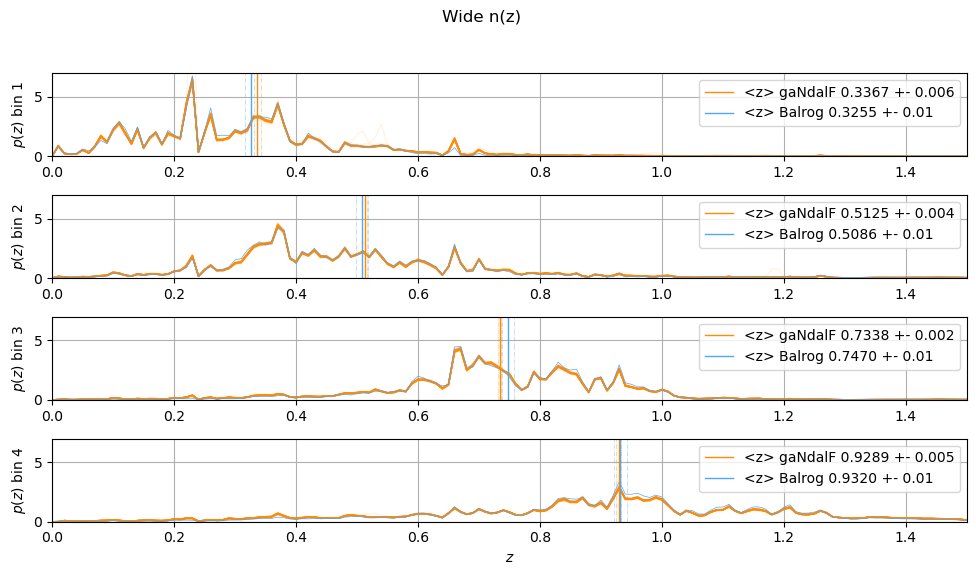

In [74]:
bootstrap_plot(path_zmean_folder, path_data_folder, path_gandalf_mean, cfg, show_plot=False, save_plot=True, save_name="/home/p/P.Gebhardt/Output/sompz_paper/bootstrap_plot.png")

In [62]:
def check_idf_flux(data_frame):
    lst_bins = ["r", "i", "z"]
    for mag_bin in lst_bins:
        flux_name = f"unsheared/flux_{mag_bin}"
        mag_name = f"unsheared/mag_{mag_bin}"
        if flux_name not in data_frame.keys():
            data_frame.loc[:, flux_name] = mag2flux(data_frame[mag_name])
    return data_frame

In [63]:
def apply_cuts(data_frame, path_master_cat):
    """"""
    data_frame = unsheared_object_cuts(data_frame=data_frame)
    data_frame = flag_cuts(data_frame=data_frame)
    data_frame = unsheared_shear_cuts(data_frame=data_frame)
    data_frame = binary_cut(data_frame=data_frame)
    data_frame = mask_cut_healpy(
        data_frame=data_frame,
        master=path_master_cat
    )
    data_frame = unsheared_mag_cut(data_frame=data_frame)
    return data_frame

In [64]:
def replace_nan(data_frame, cols, default_values):
    """"""
    for idx, col in enumerate(cols):
        data_frame[col] = data_frame[col].fillna(default_values[idx])
    return data_frame

In [24]:
def plot_binning_statistics_test(df_gandalf, df_balrog, conditions, bands, sample_size=10000, show_plot=True, save_plot=False):
    from scipy.stats import gaussian_kde
    color_gandalf = '#ff8c00'
    color_balrog = '#51a6fb'
    
    for condition in conditions:
        # try:
        cond_figure, (
            (stat_ax1), (stat_ax2), (stat_ax3)) = \
            plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
        cond_figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        cond_figure.suptitle(f"BDF_MAG_DERED_CALIB - unsheared/mag", fontsize=16)

        outputs = ['unsheared/mag_' + b for b in bands]
        true_outputs = ['BDF_MAG_DERED_CALIB_' + b.upper() for b in bands]
        output_errs = ['unsheared/mag_err_' + b for b in bands]
        lst_axis_con = [
            stat_ax1,
            stat_ax2,
            stat_ax3
        ]

        cond_lims = np.percentile(df_balrog[condition], [2, 98])
        standard_levels = [0.393, 0.865, 0.989]

        for idx, out in enumerate(zip(outputs, output_errs, true_outputs)):
            output_ = out[0]
            output_err_ = out[1]
            true_output_ = out[2]

            diff_true = (df_balrog[true_output_] - df_balrog[output_]) / df_balrog[true_output_]
            
            df_conditional_true = pd.DataFrame({
                condition: df_balrog[condition],
                f"residual band {bands[idx]}": diff_true,
                "dataset": ["Balrog" for _ in range(len(df_balrog[condition]))]
            })

            bin_means_true, bin_edges_mean_true, binnumber_true = binned_statistic(
                df_balrog[condition], diff_true, statistic='median', bins=10, range=cond_lims)
            bin_stds_true, bin_edges_true, binnumber_true = binned_statistic(
                df_balrog[condition], diff_true, statistic=median_abs_deviation, bins=10, range=cond_lims)
            xerr_true = (bin_edges_mean_true[1:] - bin_edges_mean_true[:-1]) / 2
            xmean_true = (bin_edges_mean_true[1:] + bin_edges_mean_true[:-1]) / 2
            lst_axis_con[idx].errorbar(
                xmean_true, bin_means_true, xerr=xerr_true, yerr=bin_stds_true, color=color_balrog, lw=2,
                label='Balrog')

            diff_generated = (df_gandalf[true_output_] - df_gandalf[output_]) / df_gandalf[true_output_]
            
            df_conditional_generated = pd.DataFrame({
                condition: df_gandalf[condition],
                f"residual band {bands[idx]}": diff_generated,
                "dataset": ["gaNdalF" for _ in range(len(df_gandalf[condition]))]
            })
            #df_conditional_true_sampled = df_conditional_true.sample(n=sample_size, random_state=42)
            #df_conditional_generated_sampled = df_conditional_generated.sample(n=sample_size, random_state=42)
            
            #x = df_conditional_generated_sampled[condition]
            #y = df_conditional_generated_sampled[f"residual band {bands[idx]}"]
            #xy = np.vstack([x, y])
            #kde = gaussian_kde(xy)
            #x_grid = np.linspace(x.min(), x.max(), 100)
            #y_grid = np.linspace(y.min(), y.max(), 100)
            #X, Y = np.meshgrid(x_grid, y_grid)
            #Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
            #print(f"KDE density range band {bands[idx]} cond {condition}: min={Z.min()}, max={Z.max()}")
            #continue
            bin_means_generated, bin_edges_mean_generated, binnumber_mean_generated = binned_statistic(
                df_gandalf[condition], diff_generated, statistic='median', bins=10, range=cond_lims)
            bin_stds_generated, bin_edges_generated, binnumber_generated = binned_statistic(
                df_gandalf[condition], diff_generated, statistic=median_abs_deviation, bins=10,
                range=cond_lims)
            xerr_generated = (bin_edges_mean_generated[1:] - bin_edges_mean_generated[:-1]) / 2
            xmean_generated = (bin_edges_mean_generated[1:] + bin_edges_mean_generated[:-1]) / 2
            lst_axis_con[idx].errorbar(
                xmean_generated, bin_means_generated, xerr=xerr_generated, yerr=bin_stds_generated,
                color=color_gandalf, lw=2, label='gaNdalF')
        
            m, s = np.median(diff_generated), median_abs_deviation(diff_generated)
            range_ = [m - 4 * s, m + 4 * s]
            
            df_conditional_true_sampled = df_conditional_true.sample(n=sample_size, random_state=42)
            df_conditional_generated_sampled = df_conditional_generated.sample(n=sample_size, random_state=42)
            
            sns.kdeplot(
                data=df_conditional_true_sampled,
                x=condition,
                y=f"residual band {bands[idx]}",
                fill=True,
                thresh=0,
                alpha=.4,
                levels=standard_levels,  # 10
                color=color_balrog,
                legend="Balrog",
                ax=lst_axis_con[idx]
            )
            sns.kdeplot(
                data=df_conditional_generated_sampled,
                x=condition,
                y=f"residual band {bands[idx]}",
                fill=False,
                thresh=0,
                levels=standard_levels,  # 10
                alpha=.8,
                color=color_gandalf,
                legend="gaNdalF",
                ax=lst_axis_con[idx]
            )

            lst_axis_con[idx].set_xlim(cond_lims)
            lst_axis_con[idx].set_ylim(range_)
            lst_axis_con[idx].axhline(np.median(diff_true), c='dodgerblue', ls='--', label='median Balrog')
            lst_axis_con[idx].axhline(0, c='grey', ls='--', label='zero')
            lst_axis_con[idx].axhline(np.median(diff_generated), c='darkorange', ls='--',
                                      label='median gaNdalF')
            lst_axis_con[idx].axvline(np.median(df_balrog[condition]), c='grey', ls='--',
                                      label='median conditional')
        lst_axis_con[0].legend()
        cond_figure.tight_layout()
        if save_plot is True:
            save_name = f"{path_save_plots}/cond_stat_binning_{condition}.png"
            plt.savefig(save_name, dpi=300)
        if show_plot is True:
            plt.show()
        plt.clf()
        plt.close()

In [25]:
def plot_binning_statistics_test2(df_gandalf, df_balrog, conditions, bands, sample_size=10000, show_plot=True,
                                  save_plot=False, path_save_plots=""):
    color_gandalf = '#ff8c00'
    color_balrog = '#51a6fb'
    standard_levels = [0.393, 0.865, 0.989]

    for idx, band in enumerate(bands):
        # Create a figure for the band
        fig, axes = plt.subplots(nrows=2, ncols=int(len(conditions)/2), figsize=(6 * len(conditions), 6), sharey=True)
        fig.suptitle(f"Binning Statistics and KDE for Band {band.upper()}", fontsize=16)

        axes = axes.flatten()
        
        if len(conditions) == 1:
            axes = [axes]  # Ensure axes is iterable for single condition

        for ax, condition in zip(axes, conditions):
            output = f'unsheared/mag_{band}'
            true_output = f'BDF_MAG_DERED_CALIB_{band.upper()}'
            output_err = f'unsheared/mag_err_{band}'

            # Calculate normalized residuals
            diff_true = (df_balrog[true_output] - df_balrog[output]) / (df_balrog[true_output])
            diff_generated = (df_gandalf[true_output] - df_gandalf[output]) / (df_gandalf[true_output])
            
            # Downsample data for faster plotting
            df_conditional_true = pd.DataFrame({condition: df_balrog[condition], f"residual band {band}": diff_true})
            df_conditional_generated = pd.DataFrame({condition: df_gandalf[condition], f"residual band {band}": diff_generated})
            
            #sampled_true = df_conditional_true.sample(n=min(sample_size, len(df_conditional_true)), random_state=42)
            #sampled_generated = df_conditional_generated.sample(n=min(sample_size, len(df_conditional_generated)), random_state=42)
            
            #x = sampled_generated[condition]
            #y = sampled_generated[f"residual band {band}"]
            #xy = np.vstack([x, y])
            #kde = gaussian_kde(xy)
            #x_grid = np.linspace(x.min(), x.max(), 100)
            #y_grid = np.linspace(y.min(), y.max(), 100)
            #X, Y = np.meshgrid(x_grid, y_grid)
            #Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
            #print(f"KDE density range band {band} cond {condition}: min={Z.min()}, max={Z.max()}")
            #continue
            
            # Binning statistics
            cond_lims = np.percentile(df_balrog[condition], [2, 98])
            bin_means_true, bin_edges_mean_true, binnumber_true = binned_statistic(
                df_conditional_true[condition], df_conditional_true[f"residual band {band}"], statistic='median', bins=10, range=cond_lims)
            bin_stds_true, _, _ = binned_statistic(
                df_conditional_true[condition], df_conditional_true[f"residual band {band}"], statistic=median_abs_deviation, bins=10, range=cond_lims)

            bin_means_generated, bin_edges_mean_generated, _ = binned_statistic(
                df_conditional_generated[condition], df_conditional_generated[f"residual band {band}"], statistic='median', bins=10, range=cond_lims)
            bin_stds_generated, _, _ = binned_statistic(
                df_conditional_generated[condition], df_conditional_generated[f"residual band {band}"], statistic=median_abs_deviation, bins=10, range=cond_lims)

            xerr_true = (bin_edges_mean_true[1:] - bin_edges_mean_true[:-1]) / 2
            xmean_true = (bin_edges_mean_true[1:] + bin_edges_mean_true[:-1]) / 2
            xerr_generated = (bin_edges_mean_generated[1:] - bin_edges_mean_generated[:-1]) / 2
            xmean_generated = (bin_edges_mean_generated[1:] + bin_edges_mean_generated[:-1]) / 2
            
            sampled_true = df_conditional_true.sample(n=min(sample_size, len(df_conditional_true)), random_state=42)
            sampled_generated = df_conditional_generated.sample(n=min(sample_size, len(df_conditional_generated)), random_state=42)

            # KDE plot
            sns.kdeplot(
                data=sampled_true,
                x=condition,
                y=f"residual band {band}",
                fill=True,
                thresh=0,
                alpha=.4,
                levels=standard_levels,
                color=color_balrog,
                ax=ax
            )
            sns.kdeplot(
                data=sampled_generated,
                x=condition,
                y=f"residual band {band}",
                fill=False,
                thresh=0,
                levels=standard_levels,
                color=color_gandalf,
                ax=ax
            )

            # Plot binned statistics
            ax.errorbar(
                xmean_true, bin_means_true, xerr=xerr_true, yerr=bin_stds_true, fmt='o',
                color=color_balrog, label="Balrog Binning"
            )
            ax.errorbar(
                xmean_generated, bin_means_generated, xerr=xerr_generated, yerr=bin_stds_generated, fmt='o',
                color=color_gandalf, label="gaNdalF Binning"
            )
            
            m, s = np.median(diff_generated), median_abs_deviation(diff_generated)
            range_ = [m - 4 * s, m + 4 * s]
            
            # Formatting
            ax.set_xlim(cond_lims)
            ax.set_xlabel(condition, fontsize=12)
            ax.set_ylabel(f"Residual Band {band}", fontsize=12)
            ax.set_ylim(range_)
            ax.legend()

        # Save or show the plot
        if save_plot:
            save_name = f"{path_save_plots}/binning_kde_band_{band}2.png"
            plt.savefig(save_name, dpi=300)
        if show_plot:
            plt.show()
        plt.close()

In [58]:
def plot_binning_statistics_combined(
    df_gandalf, df_balrog, sample_size=10000, show_plot=True, save_plot=False, path_save_plots=""
):
    #import numpy as np
    #import matplotlib.pyplot as plt
    #import seaborn as sns
    #from scipy.stats import binned_statistic, median_abs_deviation

    print("start plotting")
    
    color_gandalf = '#ff8c00'
    color_balrog = '#51a6fb'
    standard_levels = [0.393, 0.865, 0.989]

    # Define the grid layout
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18), sharex=False, sharey=False)

    # Define the conditions and their corresponding bands, explicitly grouped by column
    conditions_bands = {
        "R": [("FWHM_WMEAN_R", "r"), ("AIRMASS_WMEAN_R", "r"), ("MAGLIM_R", "r"), ("EBV_SFD98", "r")],
        "I": [("FWHM_WMEAN_I", "i"), ("AIRMASS_WMEAN_I", "i"), ("MAGLIM_I", "i"), ("EBV_SFD98", "i")],
        "Z": [("FWHM_WMEAN_Z", "z"), ("AIRMASS_WMEAN_Z", "z"), ("MAGLIM_Z", "z"), ("EBV_SFD98", "z")],
    }

    # Iterate over columns (bands) and rows (conditions)
    for col_idx, (band, conditions) in enumerate(conditions_bands.items()):
        for row_idx, (condition, band_letter) in enumerate(conditions):
            ax = axes[row_idx, col_idx]  # Correctly index the subplot based on row and column
            print(f"Plotting {band_letter.upper()} - {condition}")

            output = f'unsheared/mag_{band_letter}'
            true_output = f'BDF_MAG_DERED_CALIB_{band_letter.upper()}'
            output_err = f'unsheared/mag_err_{band_letter}'

            # Calculate normalized residuals
            diff_true = (df_balrog[true_output] - df_balrog[output]) / (df_balrog[true_output])
            diff_generated = (df_gandalf[true_output] - df_gandalf[output]) / (df_gandalf[true_output])

            # Downsample data for faster plotting
            df_conditional_true = pd.DataFrame({condition: df_balrog[condition], f"residual band {band_letter}": diff_true})
            df_conditional_generated = pd.DataFrame({condition: df_gandalf[condition], f"residual band {band_letter}": diff_generated})

            sampled_true = df_conditional_true.sample(n=min(sample_size, len(df_conditional_true)), random_state=42)
            sampled_generated = df_conditional_generated.sample(n=min(sample_size, len(df_conditional_generated)), random_state=42)

            # Binning statistics
            cond_lims = np.percentile(df_balrog[condition], [2, 98])
            bin_means_true, bin_edges_mean_true, binnumber_true = binned_statistic(
                sampled_true[condition], sampled_true[f"residual band {band_letter}"], statistic='median', bins=10, range=cond_lims)
            bin_stds_true, _, _ = binned_statistic(
                sampled_true[condition], sampled_true[f"residual band {band_letter}"], statistic=median_abs_deviation, bins=10, range=cond_lims)

            bin_means_generated, bin_edges_mean_generated, _ = binned_statistic(
                sampled_generated[condition], sampled_generated[f"residual band {band_letter}"], statistic='median', bins=10, range=cond_lims)
            bin_stds_generated, _, _ = binned_statistic(
                sampled_generated[condition], sampled_generated[f"residual band {band_letter}"], statistic=median_abs_deviation, bins=10, range=cond_lims)

            xerr_true = (bin_edges_mean_true[1:] - bin_edges_mean_true[:-1]) / 2
            xmean_true = (bin_edges_mean_true[1:] + bin_edges_mean_true[:-1]) / 2
            xerr_generated = (bin_edges_mean_generated[1:] - bin_edges_mean_generated[:-1]) / 2
            xmean_generated = (bin_edges_mean_generated[1:] + bin_edges_mean_generated[:-1]) / 2

            # KDE plot
            sns.kdeplot(
                data=sampled_true,
                x=condition,
                y=f"residual band {band_letter}",
                fill=True,
                thresh=0,
                alpha=.4,
                levels=standard_levels,
                color=color_balrog,
                legend="Balrog",
                ax=ax
            )
            sns.kdeplot(
                data=sampled_generated,
                x=condition,
                y=f"residual band {band_letter}",
                fill=False,
                thresh=0,
                levels=standard_levels,
                color=color_gandalf,
                legend="gaNdalF",
                ax=ax
            )

            # Plot binned statistics
            ax.errorbar(
                xmean_true, bin_means_true, xerr=xerr_true, yerr=bin_stds_true, fmt='o',
                color=color_balrog, label="Balrog Binning"
            )
            ax.errorbar(
                xmean_generated, bin_means_generated, xerr=xerr_generated, yerr=bin_stds_generated, fmt='o',
                color=color_gandalf, label="gaNdalF Binning"
            )
            
            m, s = np.median(diff_generated), median_abs_deviation(diff_generated)
            range_ = [m - 4 * s, m + 4 * s]
            
            ax.axhline(np.median(diff_true), c=color_balrog, ls='--', label='median Balrog')
            ax.axhline(0, c='grey', ls='--', label='zero')
            ax.axhline(np.median(diff_generated), c=color_gandalf, ls='--', label='median gaNdalF')
            ax.axvline(np.median(df_balrog[condition]), c='grey', ls='--', label='median conditional')
            
            # Formatting
            ax.set_xlim(cond_lims)
            ax.set_ylim(range_)
            ax.set_xlabel(condition, fontsize=8)
            ax.set_ylabel(f"Residual Band {band_letter}", fontsize=8)
            ax.set_title(f"{band_letter.upper()} - {condition}", fontsize=10)
            ax.tick_params(axis='both', which='major', labelsize=8)
            # if row_idx == 0 and col_idx == 0:
            ax.legend(fontsize=6)

    # Adjust layout and save/show the plot
    fig.tight_layout()
    if save_plot:
        save_name = f"{path_save_plots}/combined_binning_kde.png"
        plt.savefig(save_name, dpi=300)
    if show_plot:
        plt.show()
    plt.close()

In [65]:
path_data = "/project/ls-gruen/users/patrick.gebhardt/data/gaNdalF_paper_catalogs"
filename_flw_balrog = "2024-10-28_08-14_balrog_flw_Test_sample.pkl"
filename_flw_gandalf = "2024-10-28_08-14_gandalf_flw_Test_sample.pkl"
path_master_cat="/project/ls-gruen/users/patrick.gebhardt/data/gaNdalF/Y3_mastercat_02_05_21.h5"
path_save_plots = "/home/p/P.Gebhardt/Output/gaNdalF_paper"

In [66]:
df_balrog_flw = pd.read_pickle(f"{path_data}/{filename_flw_balrog}")
df_gandalf_flw = pd.read_pickle(f"{path_data}/{filename_flw_gandalf}")

df_gandalf_flw = replace_nan(
        data_frame=df_gandalf_flw,
        cols=[
            "unsheared/mag_r",
            "unsheared/mag_i",
            "unsheared/mag_z",
            "unsheared/snr",
            "unsheared/size_ratio",
            "unsheared/weight",
            "unsheared/T",
        ],
        default_values=[
            df_balrog_flw["unsheared/mag_r"].max(),
            df_balrog_flw["unsheared/mag_i"].max(),
            df_balrog_flw["unsheared/mag_z"].max(),
            df_balrog_flw["unsheared/snr"].max(),
            df_balrog_flw["unsheared/size_ratio"].max(),
            df_balrog_flw["unsheared/weight"].max(),
            df_balrog_flw["unsheared/T"].max(),
        ]
    )

df_gandalf_flw["Color unsheared MAG r-i"] = df_gandalf_flw["unsheared/mag_r"] - df_gandalf_flw["unsheared/mag_i"]
df_gandalf_flw["Color unsheared MAG i-z"] = df_gandalf_flw["unsheared/mag_i"] - df_gandalf_flw["unsheared/mag_z"]

df_balrog_flw = check_idf_flux(df_balrog_flw)
df_gandalf_flw = check_idf_flux(df_gandalf_flw)

df_balrog_flw_cut = apply_cuts(df_balrog_flw, path_master_cat)
df_gandalf_flw_cut = apply_cuts(df_gandalf_flw, path_master_cat)

Apply unsheared object cuts
Length of catalog after applying unsheared object cuts: 8558103
Apply flag cuts
Length of catalog after applying flag cuts: 7380882
Apply unsheared shear cuts
Length of catalog after applying unsheared shear cuts: 2594957


/home/p/P.Gebhardt/development/GalaxyFlow/Handler/cut_functions.py:139: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  binaries = highe_cut * magT_cut


perform binaries cut
len w/ binaries 2594692
define mask
pass:  2482640
fail:  112052
Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 2416826
Apply unsheared object cuts
Length of catalog after applying unsheared object cuts: 7191034
Apply flag cuts
Length of catalog after applying flag cuts: 6250203
Apply unsheared shear cuts
Length of catalog after applying unsheared shear cuts: 2519746


/software/opt/el_9/x86_64/python/3.11-2023.09/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


perform binaries cut
len w/ binaries 2519463
define mask
pass:  2412544
fail:  106919
Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 2337709


In [42]:
plot_binning_statistics_test(
        df_gandalf=df_gandalf_flw_cut,
        df_balrog=df_balrog_flw_cut,
        conditions=[
            "FWHM_WMEAN_R",
            #"FWHM_WMEAN_I",
            #"FWHM_WMEAN_Z",
            "AIRMASS_WMEAN_R",
            #"AIRMASS_WMEAN_I",
            #"AIRMASS_WMEAN_Z",
            "MAGLIM_R",
            #"MAGLIM_I",
            #"MAGLIM_Z",
            "EBV_SFD98"
        ],
        bands=["r", "i", "z"],
        sample_size=5000,
        show_plot=True,
        save_plot=False,
        ylim=(-0.02, 0.02)
    )

TypeError: plot_binning_statistics_test() got an unexpected keyword argument 'ylim'

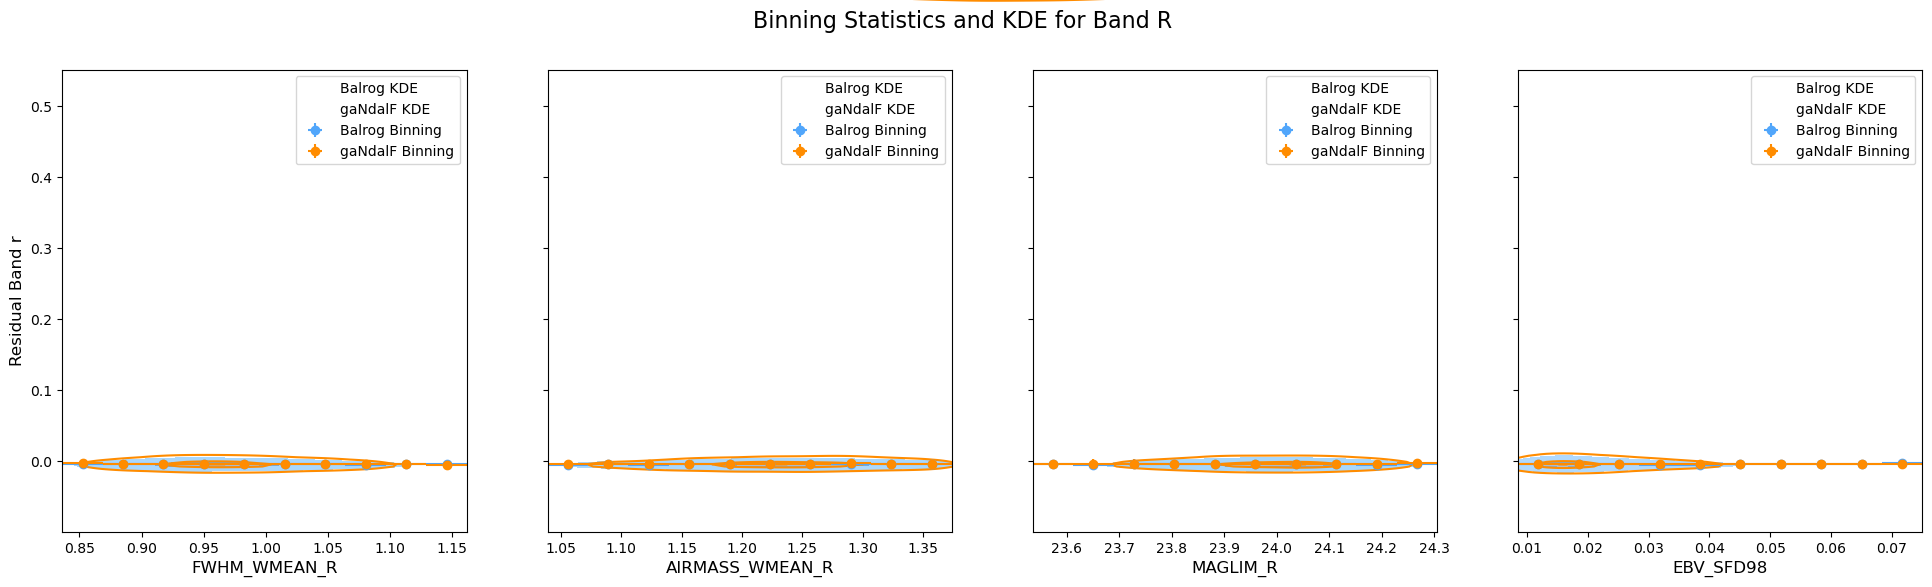

In [41]:
plot_binning_statistics_test2(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    conditions=[
        "FWHM_WMEAN_R",
        "AIRMASS_WMEAN_R",
        "MAGLIM_R",
        "EBV_SFD98"
    ],
    bands=[
        "r",
    ],
    sample_size=10000,
    show_plot=True,
    save_plot=False
)

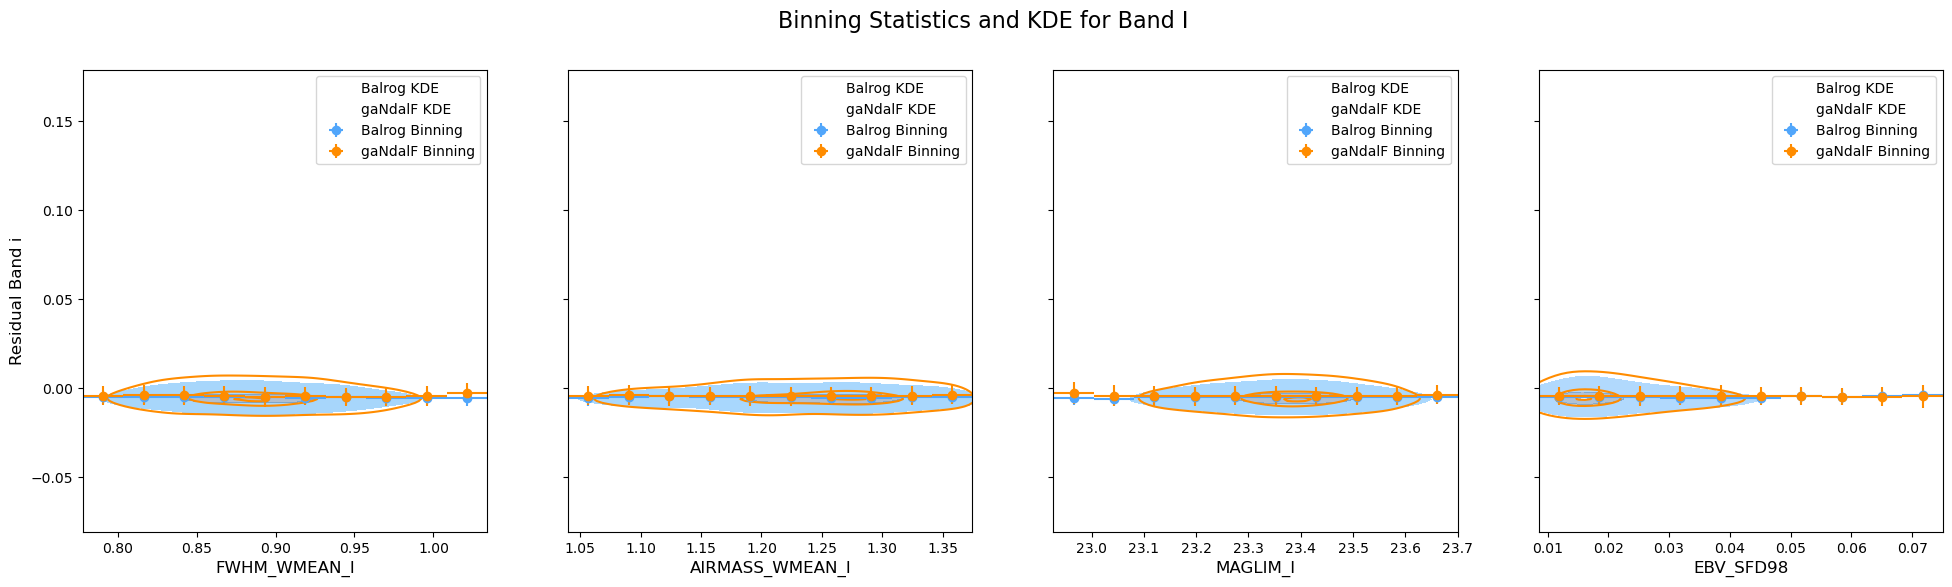

In [40]:
plot_binning_statistics_test2(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    conditions=[
        "FWHM_WMEAN_I",
        "AIRMASS_WMEAN_I",
        "MAGLIM_I",
        "EBV_SFD98"
    ],
    bands=[
        "i",
    ],
    sample_size=10000,
    show_plot=True,
    save_plot=False
)

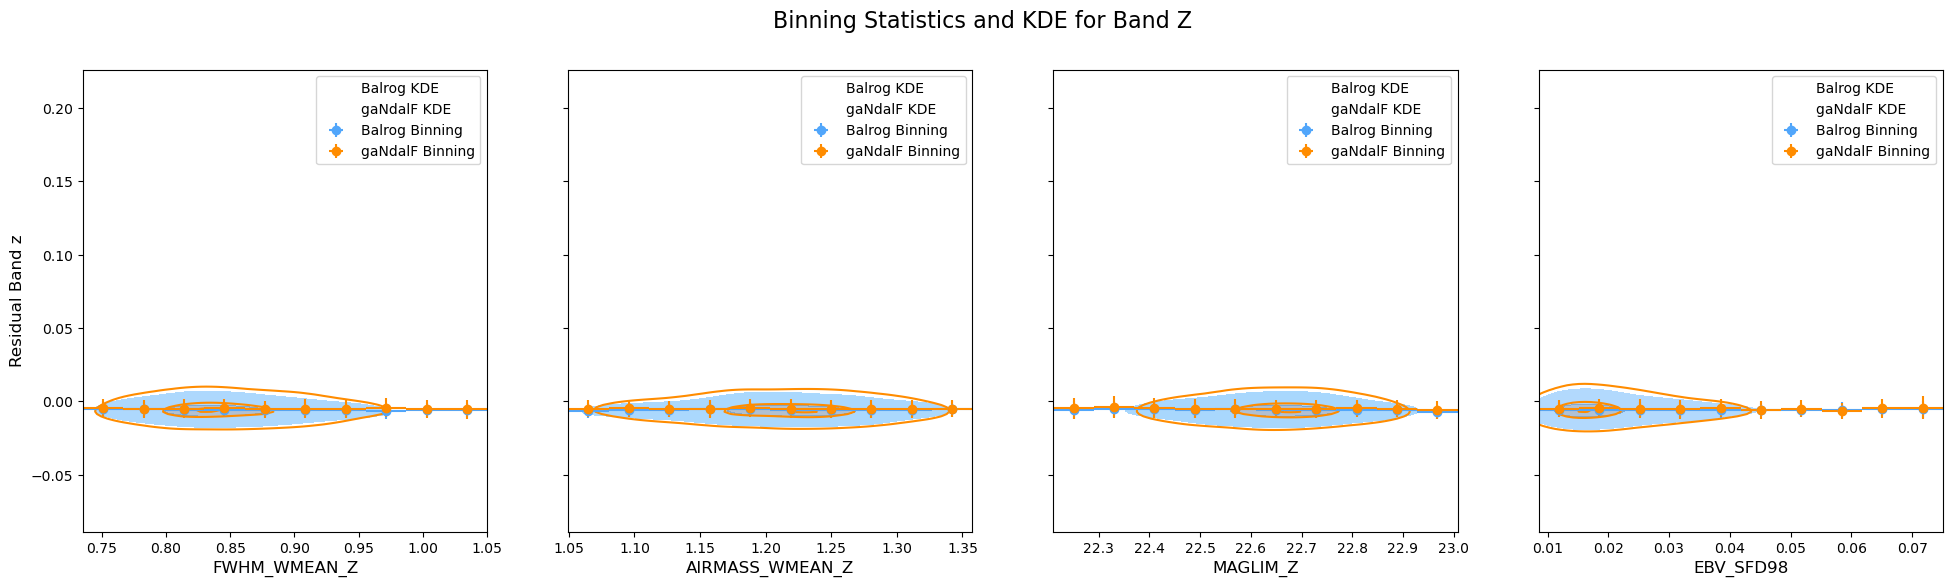

In [39]:
plot_binning_statistics_test2(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    conditions=[
        "FWHM_WMEAN_Z",
        "AIRMASS_WMEAN_Z",
        "MAGLIM_Z",
        "EBV_SFD98"
    ],
    bands=[
        "z",
    ],
    sample_size=10000,
    show_plot=True,
    save_plot=False
)

start plotting
Plotting R - FWHM_WMEAN_R
Plotting R - AIRMASS_WMEAN_R
Plotting R - MAGLIM_R
Plotting R - EBV_SFD98
Plotting I - FWHM_WMEAN_I
Plotting I - AIRMASS_WMEAN_I
Plotting I - MAGLIM_I
Plotting I - EBV_SFD98
Plotting Z - FWHM_WMEAN_Z
Plotting Z - AIRMASS_WMEAN_Z
Plotting Z - MAGLIM_Z
Plotting Z - EBV_SFD98


PermissionError: [Errno 13] Permission denied: '/combined_binning_kde.png'

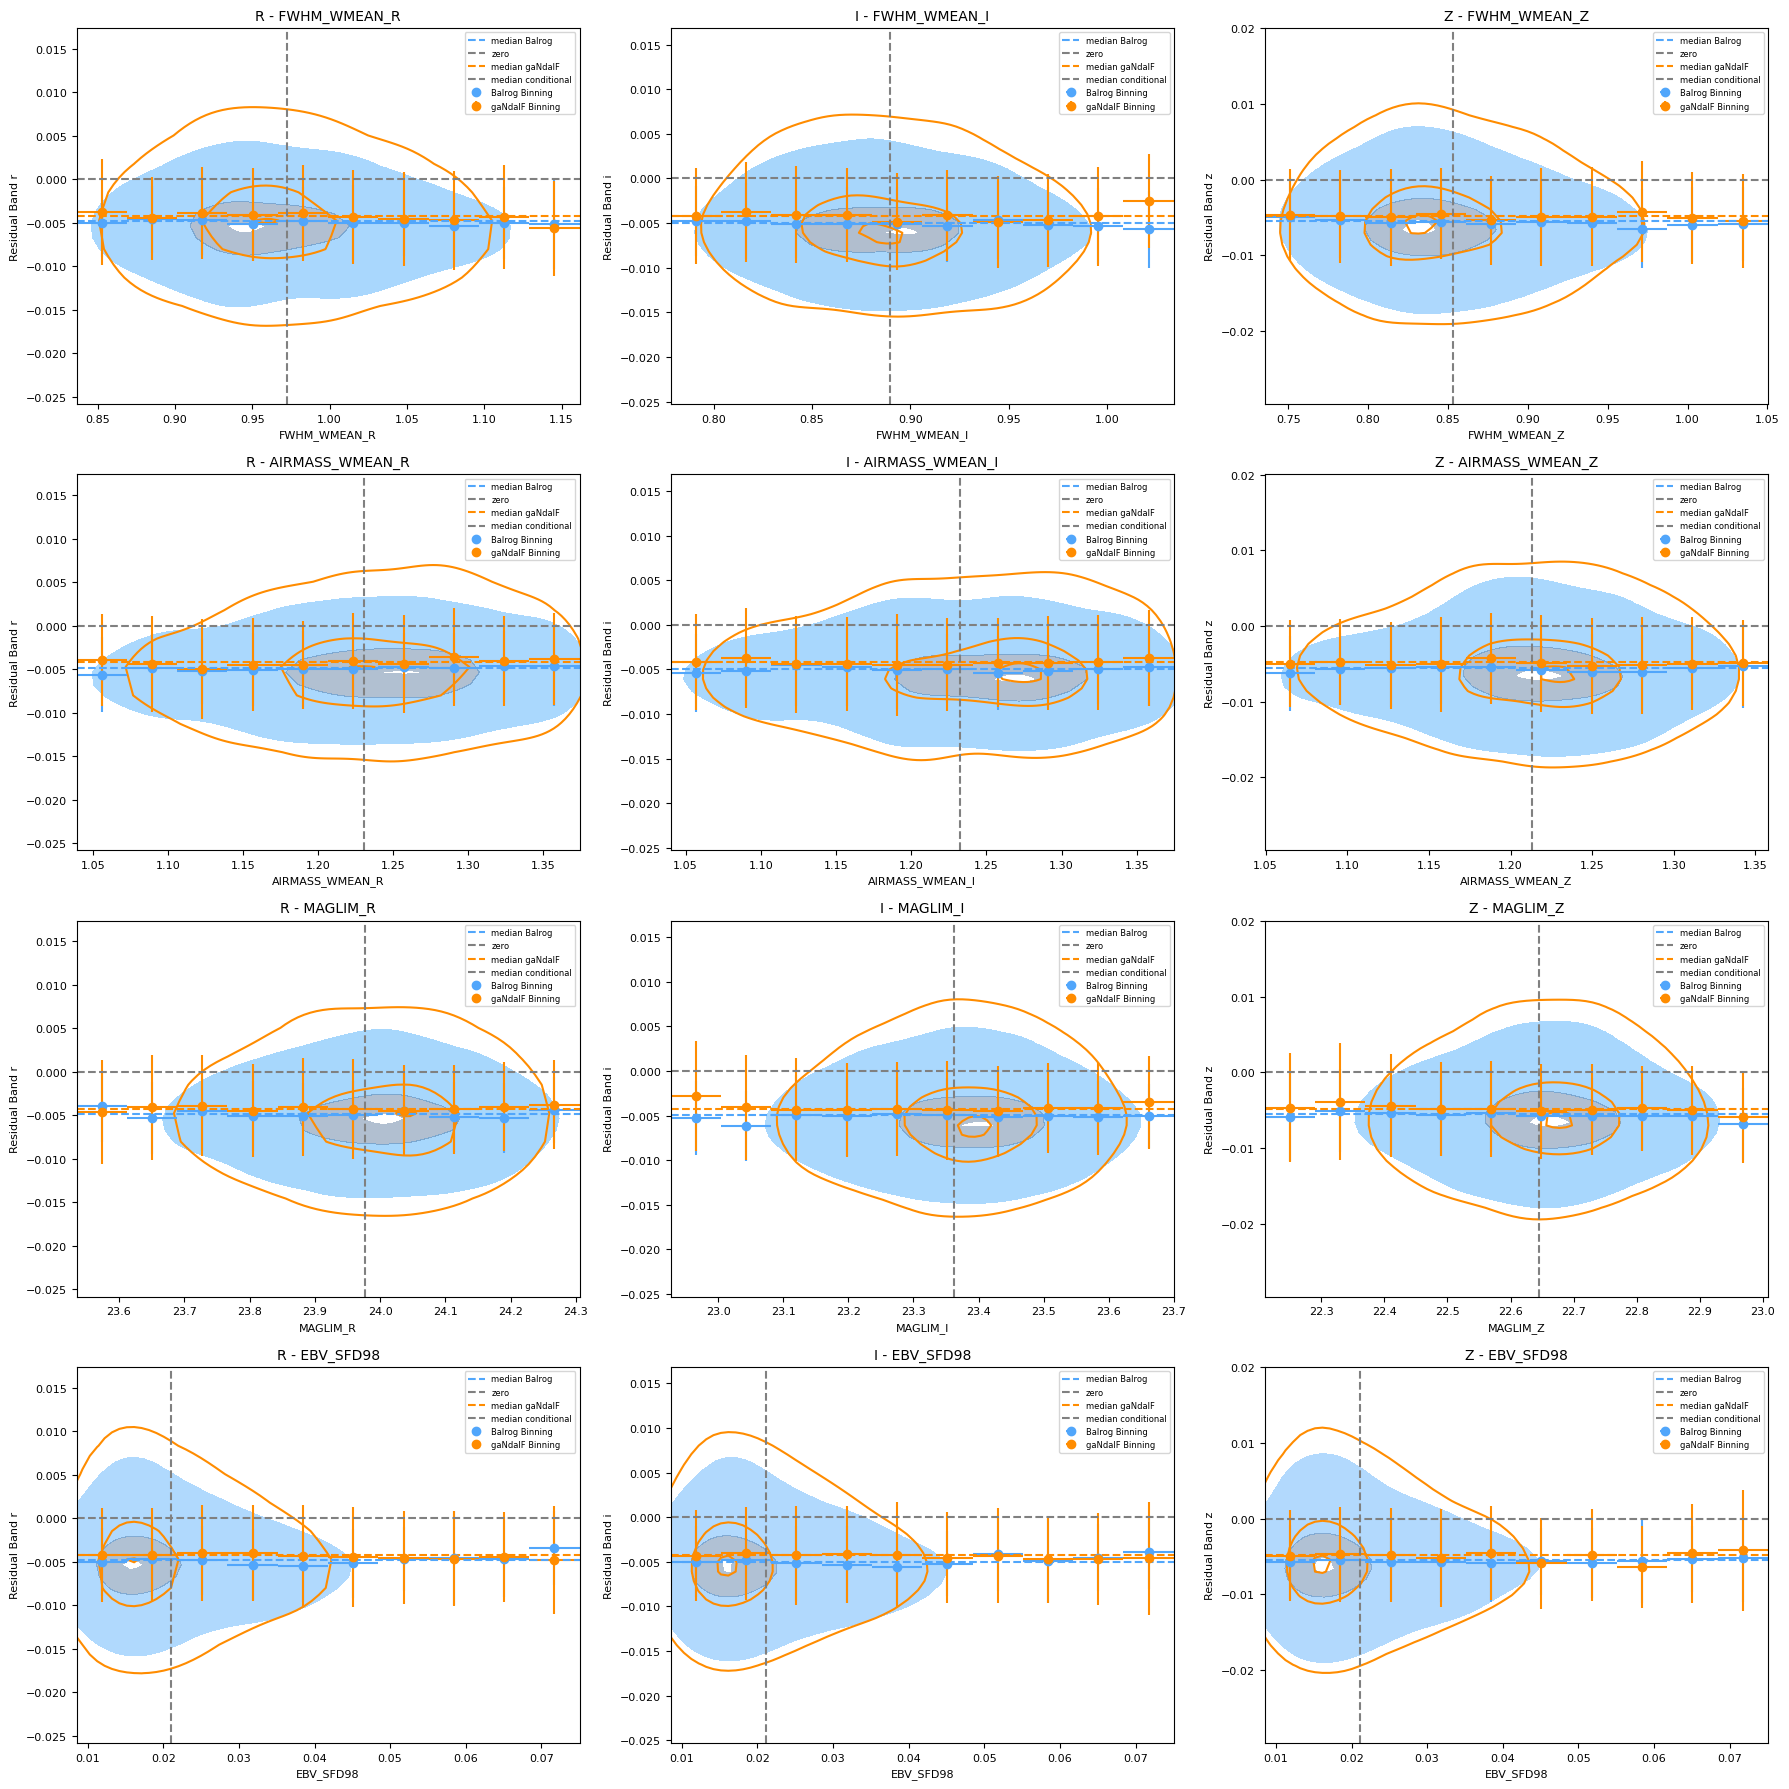

In [60]:
plot_binning_statistics_combined(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    sample_size=10000,
    show_plot=False,
    save_plot=True
)

In [72]:
def plot_binning_statistics_combined(df_gandalf, df_balrog, sample_size=10000, save_plot=False, path_save_plots=""):
    print("Start plotting")
    
    # Define colors and levels
    color_gandalf = '#ff8c00'
    color_balrog = '#51a6fb'
    standard_levels = [0.393, 0.865, 0.989]

    # Define bands and conditions
    conditions_bands = {
        "r": [("FWHM_WMEAN_R", "FWHM"), ("AIRMASS_WMEAN_R", "AIRMASS"), ("MAGLIM_R", "MAGLIM"), ("EBV_SFD98", "EBV")],
        "i": [("FWHM_WMEAN_I", "FWHM"), ("AIRMASS_WMEAN_I", "AIRMASS"), ("MAGLIM_I", "MAGLIM"), ("EBV_SFD98", "EBV")],
        "z": [("FWHM_WMEAN_Z", "FWHM"), ("AIRMASS_WMEAN_Z", "AIRMASS"), ("MAGLIM_Z", "MAGLIM"), ("EBV_SFD98", "EBV")],
    }

    residual_properties = ['mag', 'snr', 'size_ratio', 'T', 'weight']
    
    # Generate one plot per band and one for EBV
    for band, conditions in conditions_bands.items():
        fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18), sharex=False, sharey=False)
        for idx, (condition, label) in enumerate(conditions):
            print(f"Plotting {band.upper()} - {condition}")
            row, col = divmod(idx, 4)
            ax = axes[row, col]
            
            # Residual calculations
            output = f'unsheared/mag_{band}'
            true_output = f'BDF_MAG_DERED_CALIB_{band.upper()}'
            output_err = f'unsheared/mag_err_{band}'

            diff_true = (df_balrog[true_output] - df_balrog[output]) / df_balrog[true_output]
            diff_generated = (df_gandalf[true_output] - df_gandalf[output]) / df_gandalf[true_output]

            # Downsample data
            sampled_true = pd.DataFrame({condition: df_balrog[condition], "residual": diff_true}).sample(
                n=min(sample_size, len(df_balrog)), random_state=42
            )
            sampled_generated = pd.DataFrame({condition: df_gandalf[condition], "residual": diff_generated}).sample(
                n=min(sample_size, len(df_gandalf)), random_state=42
            )

            # KDE plot
            sns.kdeplot(
                data=sampled_true, x=condition, y="residual", fill=True, thresh=0, levels=standard_levels,
                color=color_balrog, ax=ax
            )
            sns.kdeplot(
                data=sampled_generated, x=condition, y="residual", fill=False, levels=standard_levels,
                color=color_gandalf, ax=ax
            )

            # Binned statistics
            bin_means_true, bin_edges, _ = binned_statistic(
                sampled_true[condition], sampled_true["residual"], statistic='median', bins=10
            )
            bin_stds_true, _, _ = binned_statistic(
                sampled_true[condition], sampled_true["residual"], statistic=median_abs_deviation, bins=10
            )

            bin_means_gen, bin_edges, _ = binned_statistic(
                sampled_generated[condition], sampled_generated["residual"], statistic='median', bins=10
            )
            bin_stds_gen, _, _ = binned_statistic(
                sampled_generated[condition], sampled_generated["residual"], statistic=median_abs_deviation, bins=10
            )

            xerr = (bin_edges[1:] - bin_edges[:-1]) / 2
            xmean = (bin_edges[1:] + bin_edges[:-1]) / 2

            ax.errorbar(xmean, bin_means_true, yerr=bin_stds_true, fmt='o', color=color_balrog, label="Balrog")
            ax.errorbar(xmean, bin_means_gen, yerr=bin_stds_gen, fmt='o', color=color_gandalf, label="gaNdalF")

            # Formatting
            ax.set_title(f"{label} - {band.upper()}", fontsize=10)
            ax.set_xlabel(label)
            ax.set_ylabel("Residual")
            ax.legend()

        # Save each band plot
        fig.tight_layout()
        if save_plot:
            fig.savefig(f"{path_save_plots}/binning_combined_{band}.png", dpi=300)
        plt.show()
    
    # Plot for EBV (simpler layout, 2x2 grid)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    ebv_conditions = ["AIRMASS_WMEAN", "MAGLIM", "FWHM_WMEAN", "EBV_SFD98"]
    for idx, condition in enumerate(ebv_conditions):
        print(f"Plotting ebv - {condition}")
        row, col = divmod(idx, 2)
        ax = axes[row, col]
        
        # Residual calculations (use one band as reference for simplicity)
        band = 'r'
        diff_true = (df_balrog[f'BDF_MAG_DERED_CALIB_{band.upper()}'] - df_balrog[f'unsheared/mag_{band}']) / df_balrog[f'BDF_MAG_DERED_CALIB_{band.upper()}']
        diff_generated = (df_gandalf[f'BDF_MAG_DERED_CALIB_{band.upper()}'] - df_gandalf[f'unsheared/mag_{band}']) / df_gandalf[f'BDF_MAG_DERED_CALIB_{band.upper()}']

        sampled_true = pd.DataFrame({condition: df_balrog[condition], "residual": diff_true}).sample(
            n=min(sample_size, len(df_balrog)), random_state=42
        )
        sampled_generated = pd.DataFrame({condition: df_gandalf[condition], "residual": diff_generated}).sample(
            n=min(sample_size, len(df_gandalf)), random_state=42
        )

        sns.kdeplot(data=sampled_true, x=condition, y="residual", fill=True, levels=standard_levels, color=color_balrog, ax=ax)
        sns.kdeplot(data=sampled_generated, x=condition, y="residual", fill=False, levels=standard_levels, color=color_gandalf, ax=ax)

        ax.set_title(f"EBV - {condition}", fontsize=10)
        ax.set_xlabel(condition)
        ax.set_ylabel("Residual")

    fig.tight_layout()
    if save_plot:
        fig.savefig(f"{path_save_plots}/binning_combined_ebv.png", dpi=300)
    plt.show()

Start plotting


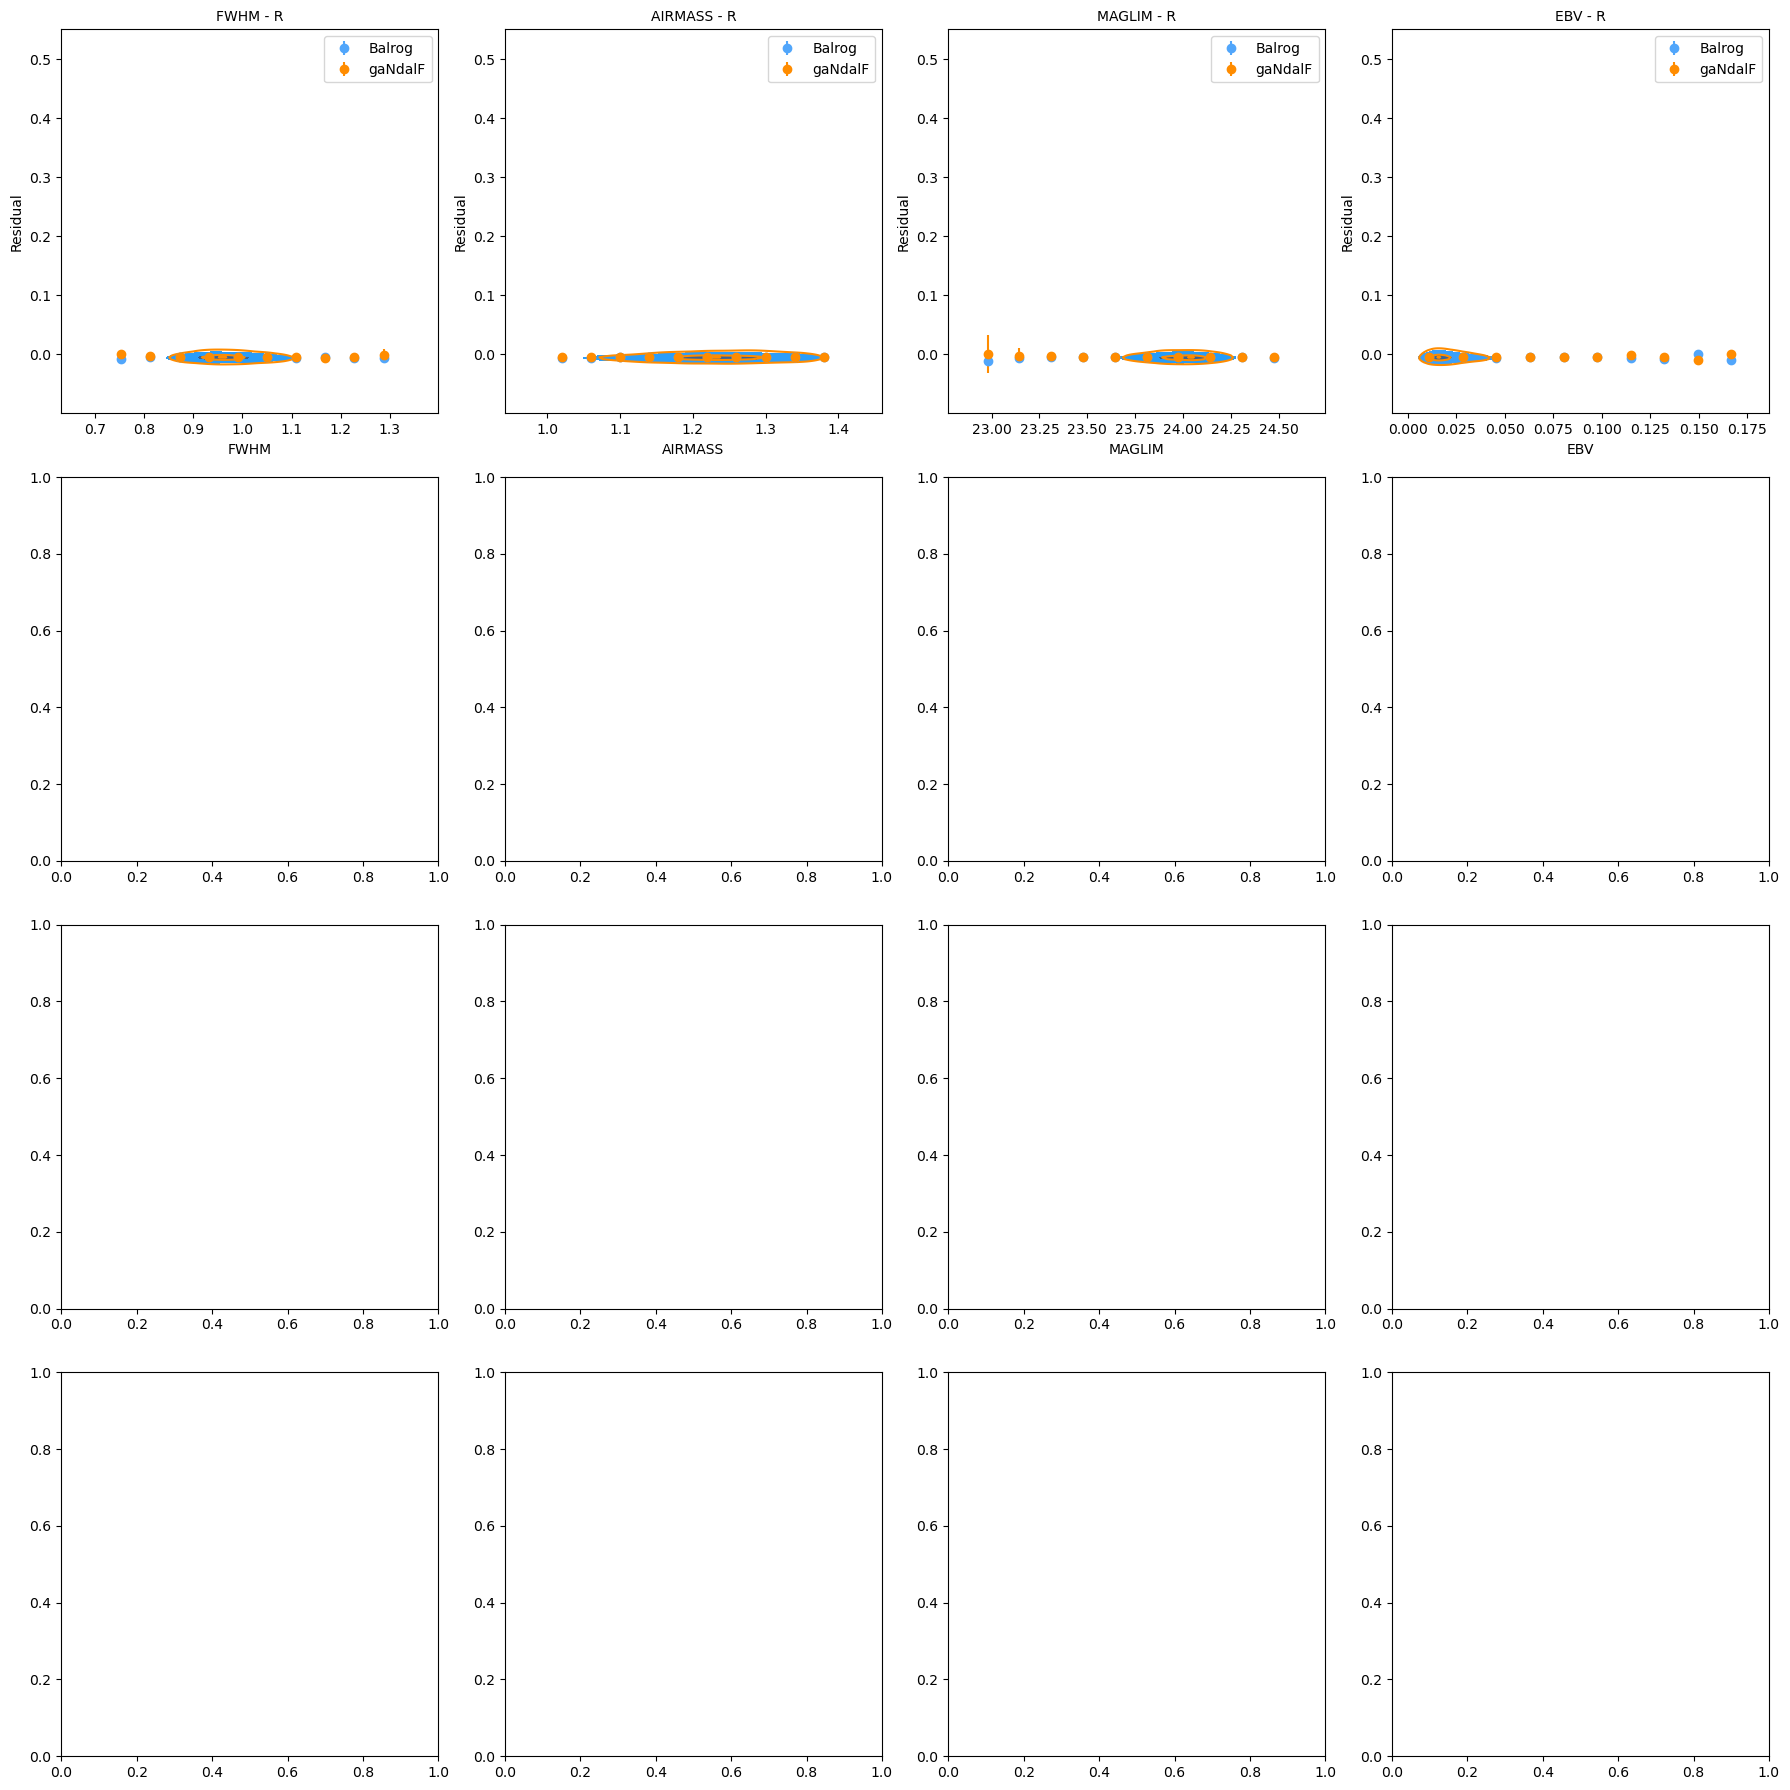

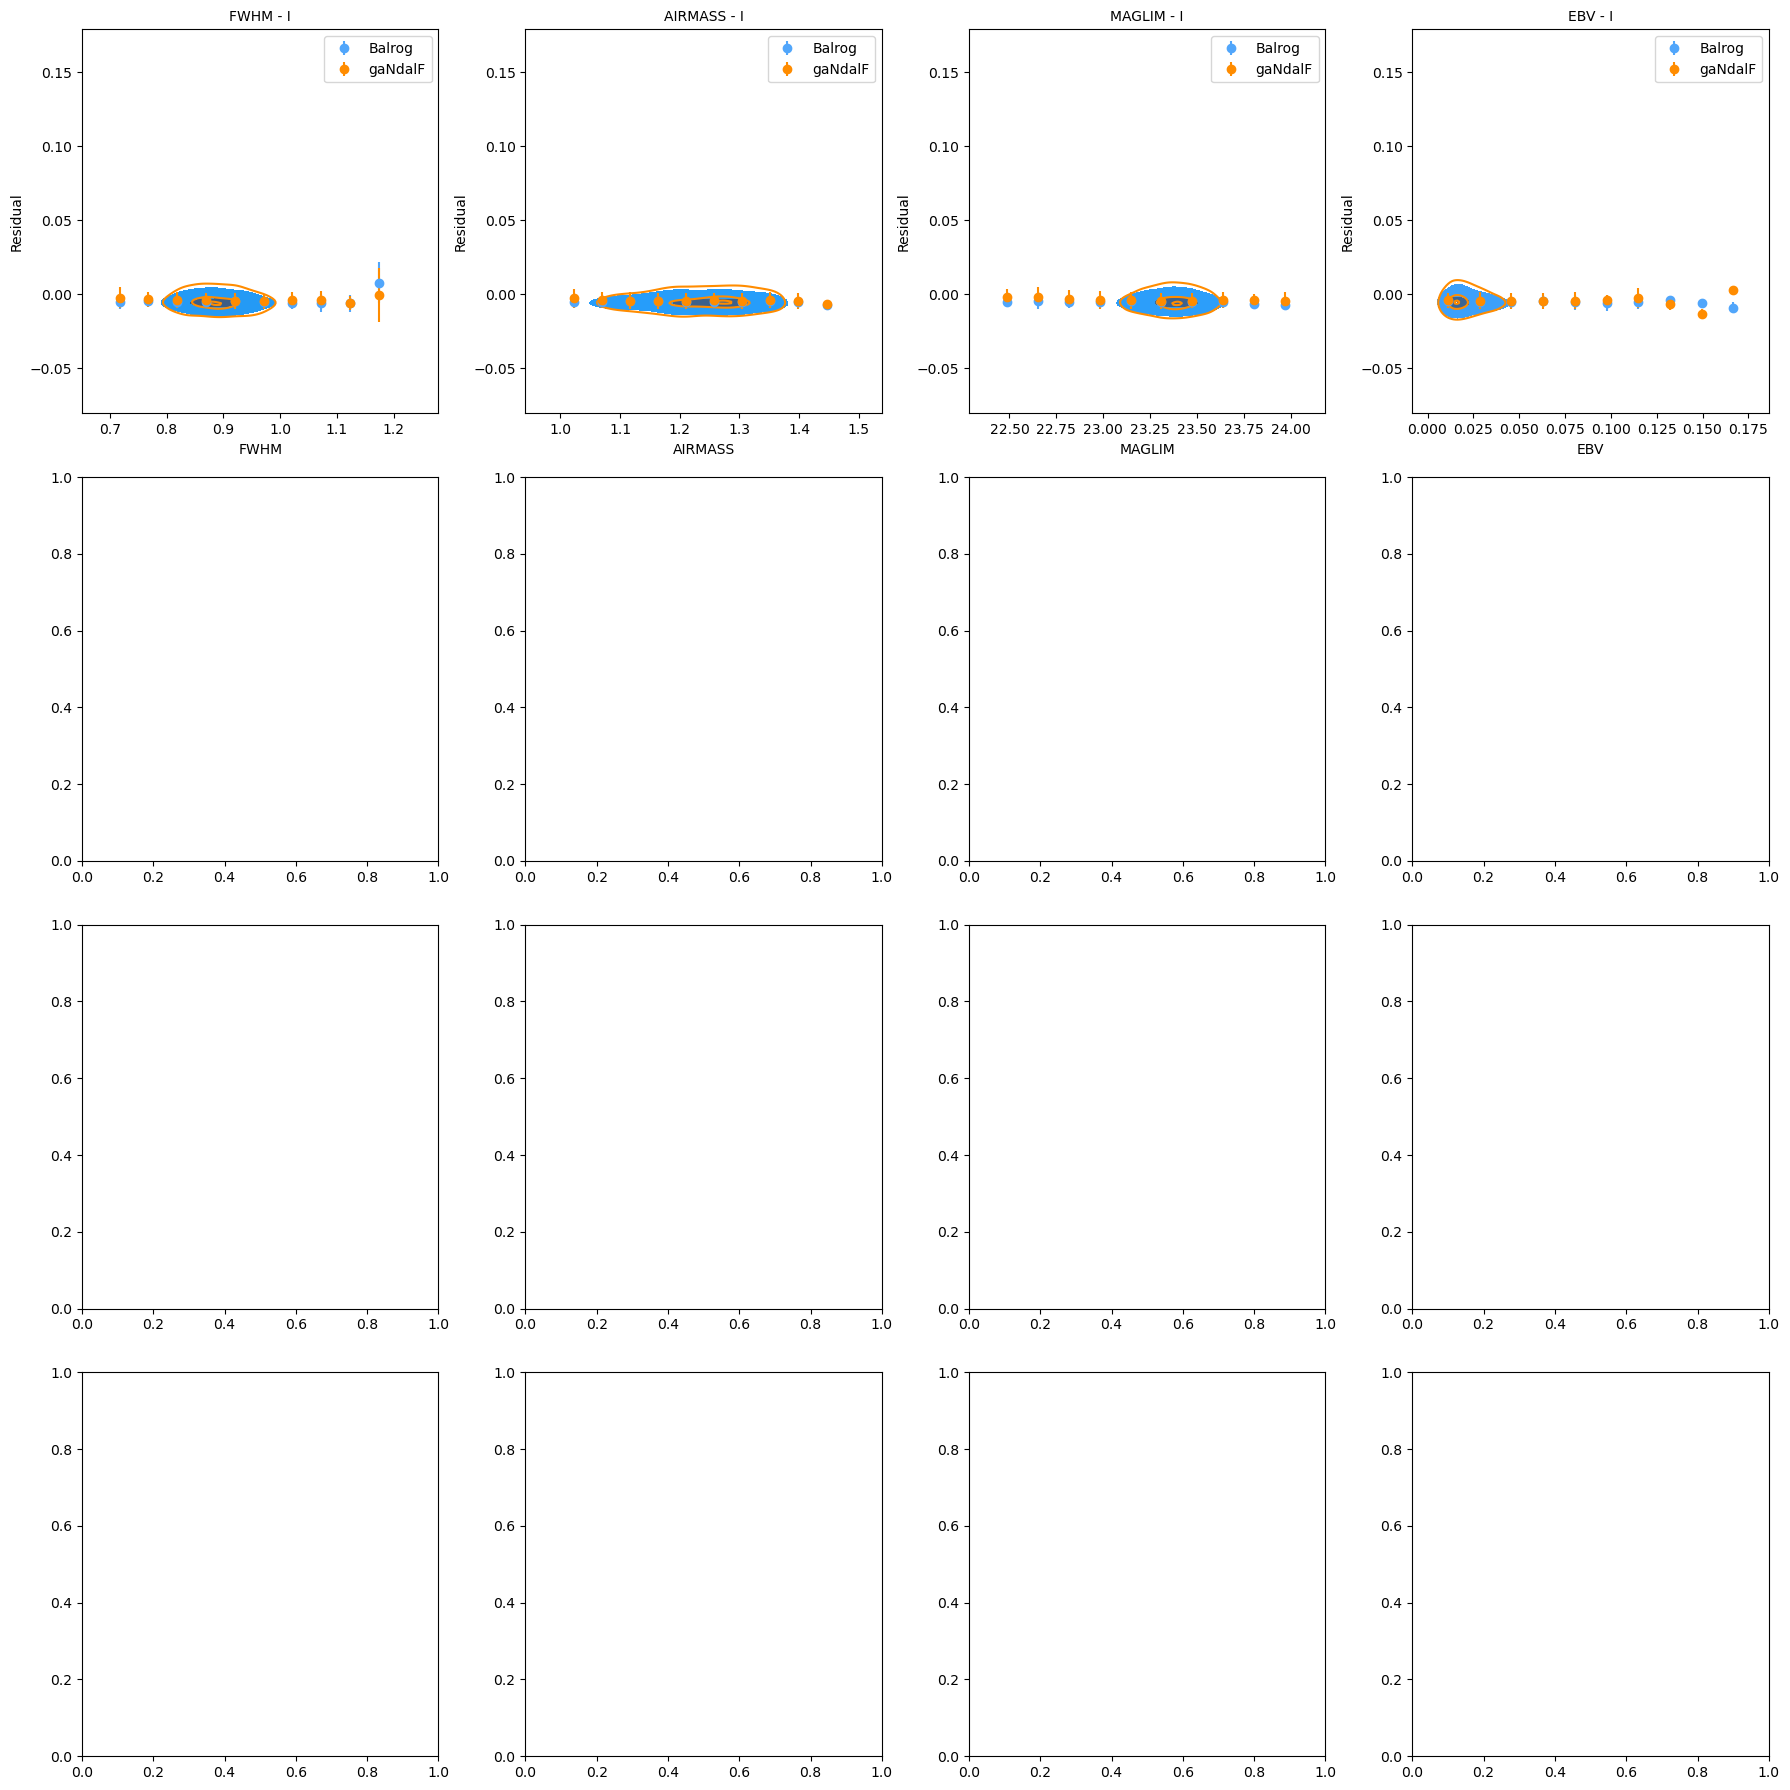

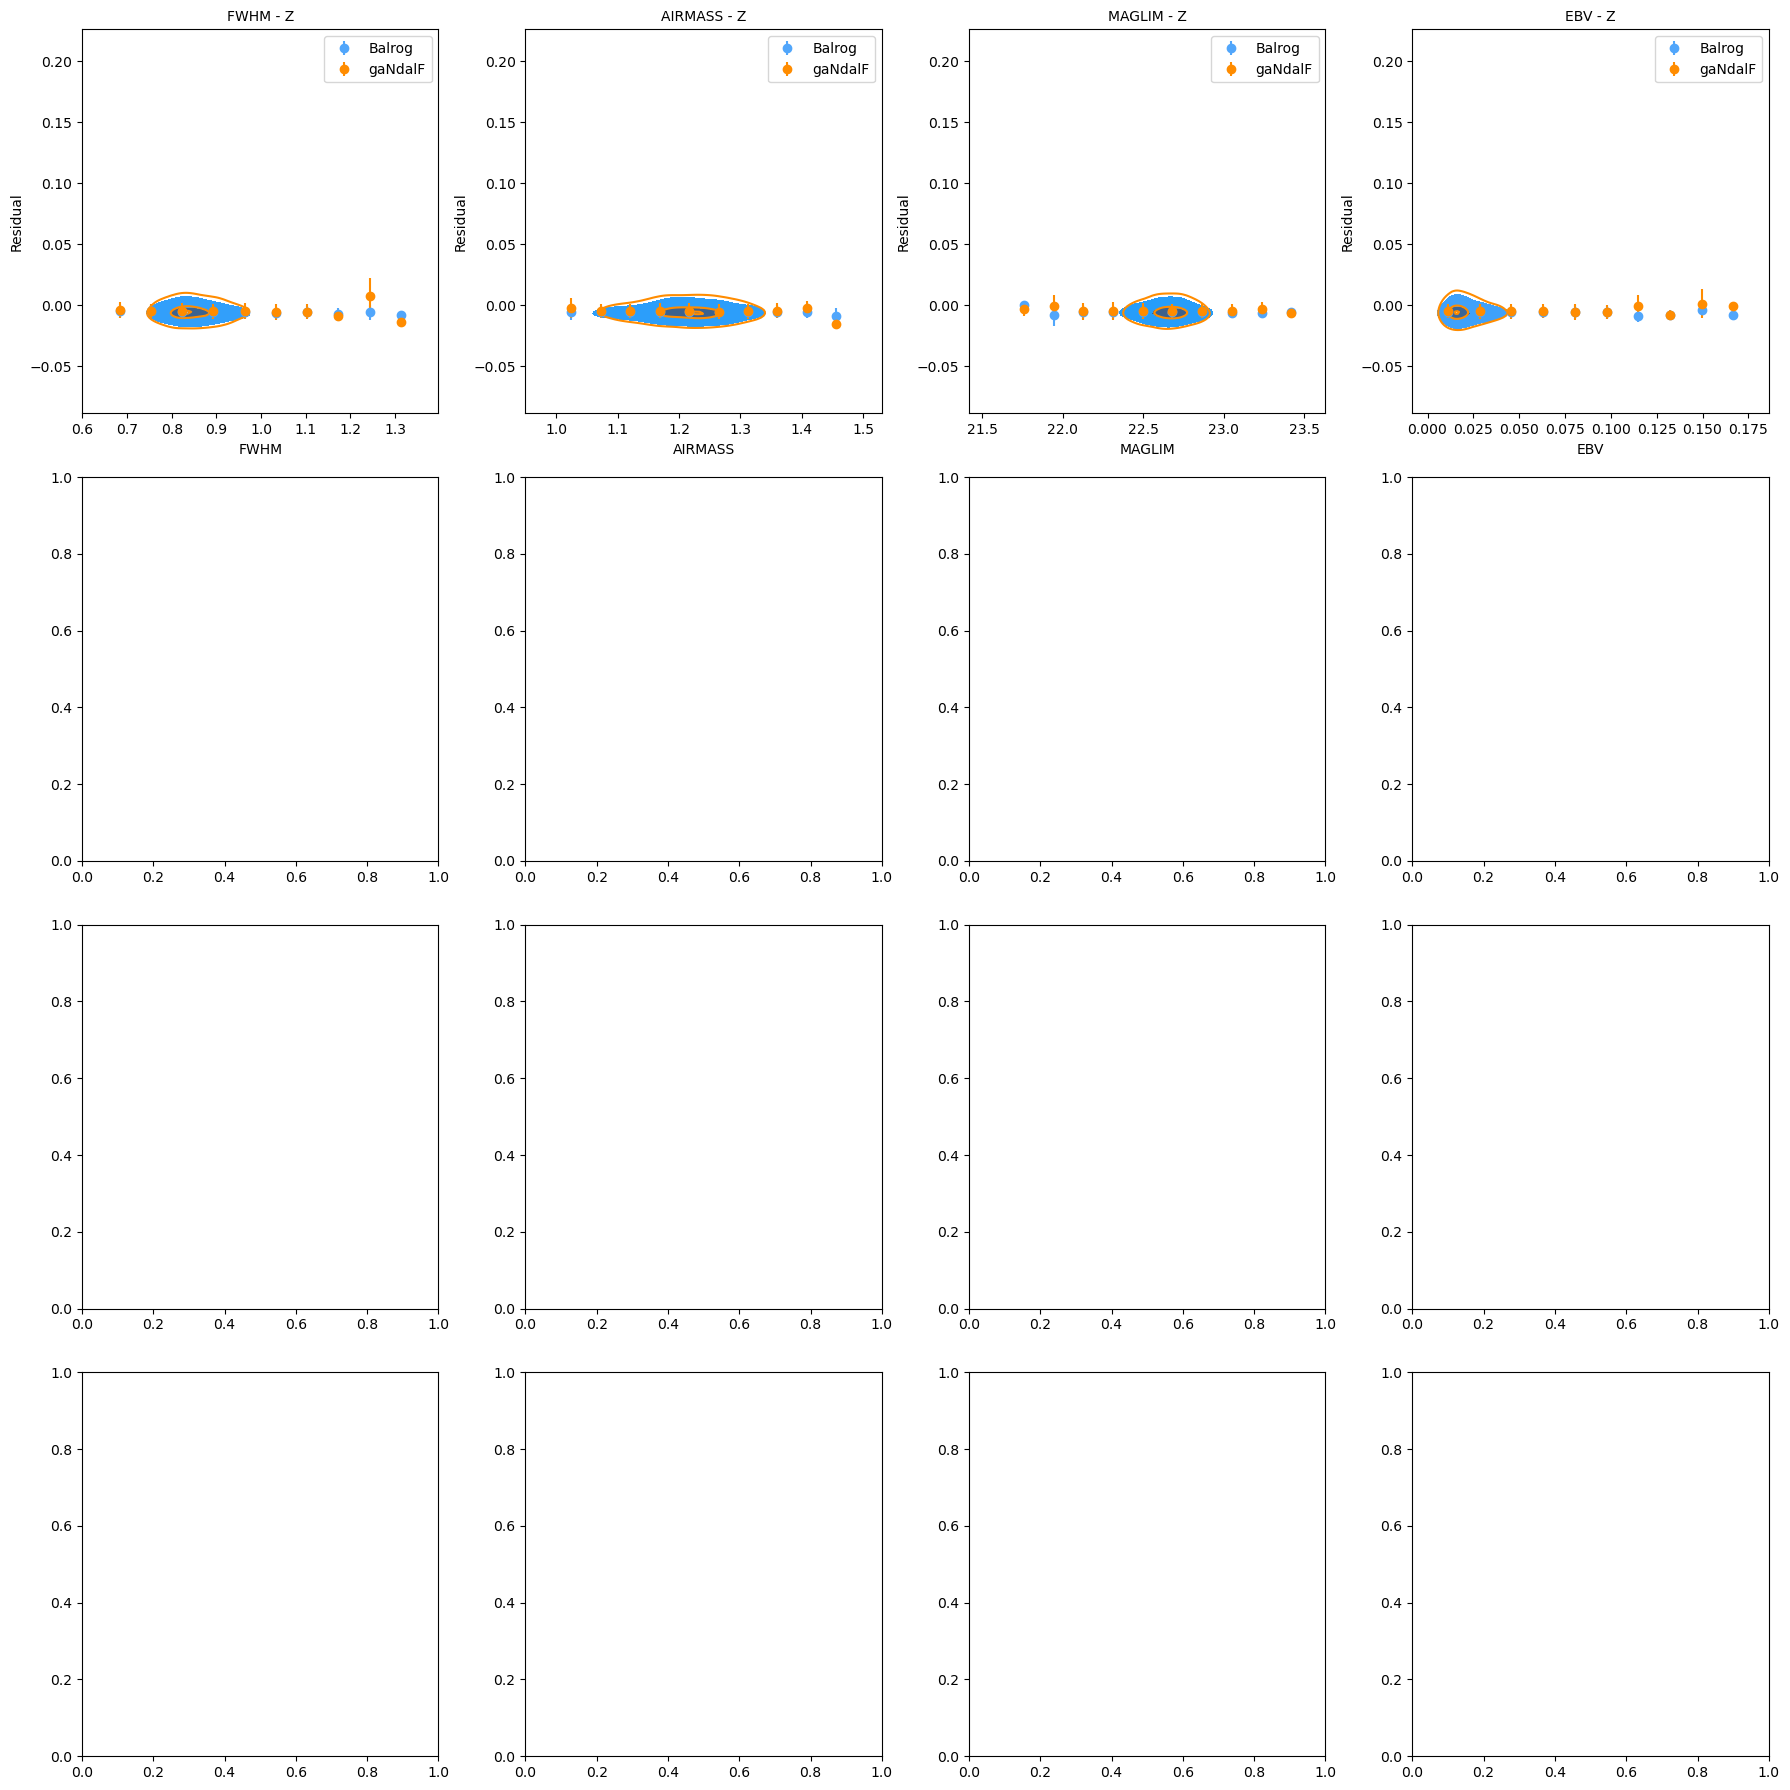

KeyError: 'AIRMASS_WMEAN'

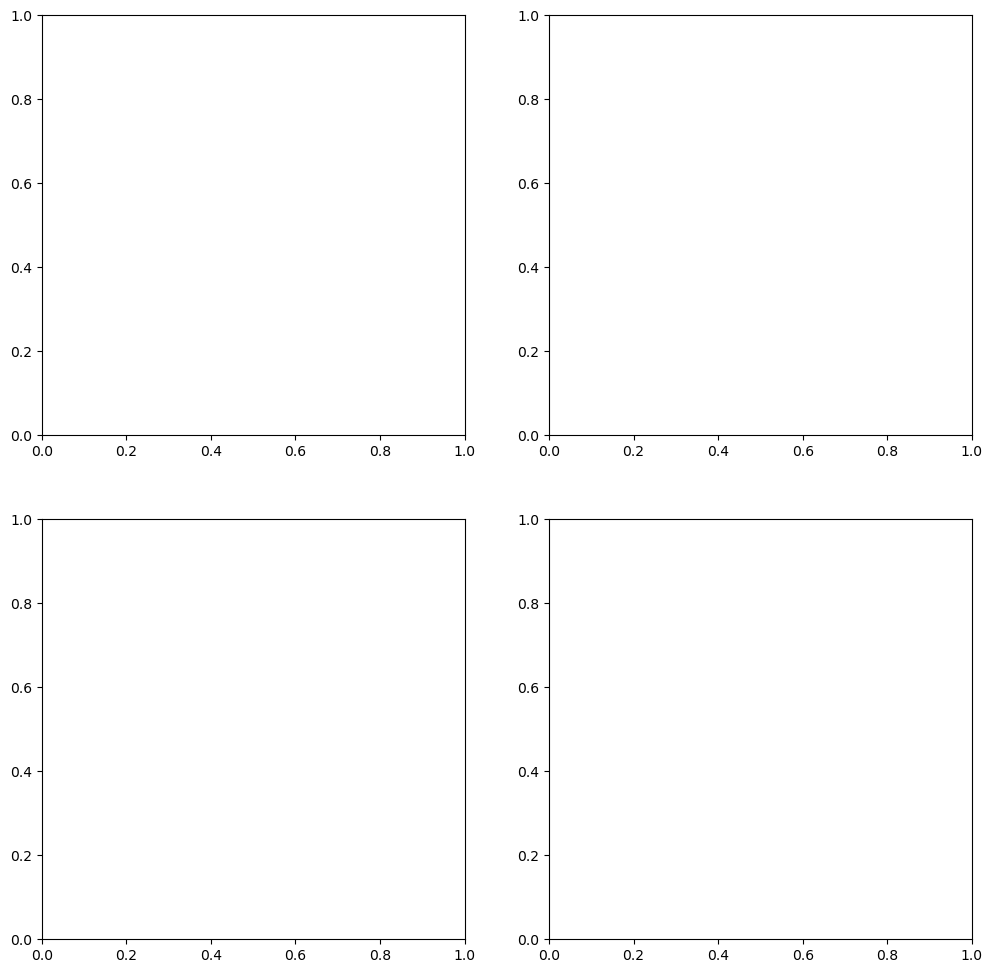

In [76]:
# Example Usage
bands = ['r', 'i', 'z']
conditions = ['AIRMASS_WMEAN', 'MAGLIM', 'FWHM_WMEAN', 'EBV_SFD98']
residual_properties = ['mag', 'snr', 'size_ratio', 'T', 'weight']
plot_binning_statistics_combined(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    save_plot=False,
    path_save_plots=path_save_plots
)